In [1]:
# Load tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make graphs pretty
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load our golden file
df = pd.read_csv('../data/restaurants_enriched.csv')

# Show first 5 rows to make sure it loaded
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,menu_item,listed_in(type),listed_in(city),restaurant_name,total_orders,avg_rating,avg_delivery_time,cuisine_count,cost_category,is_high_rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,[],Buffet,Banashankari,NaN,0.0,0.0,0.0,3.0,High,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,[],Buffet,Banashankari,NaN,0.0,0.0,0.0,3.0,High,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,[],Buffet,Banashankari,NaN,0.0,0.0,0.0,3.0,High,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,[],Buffet,Banashankari,NaN,0.0,0.0,0.0,2.0,Low,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,[],Buffet,Banashankari,NaN,0.0,0.0,0.0,2.0,Medium,0


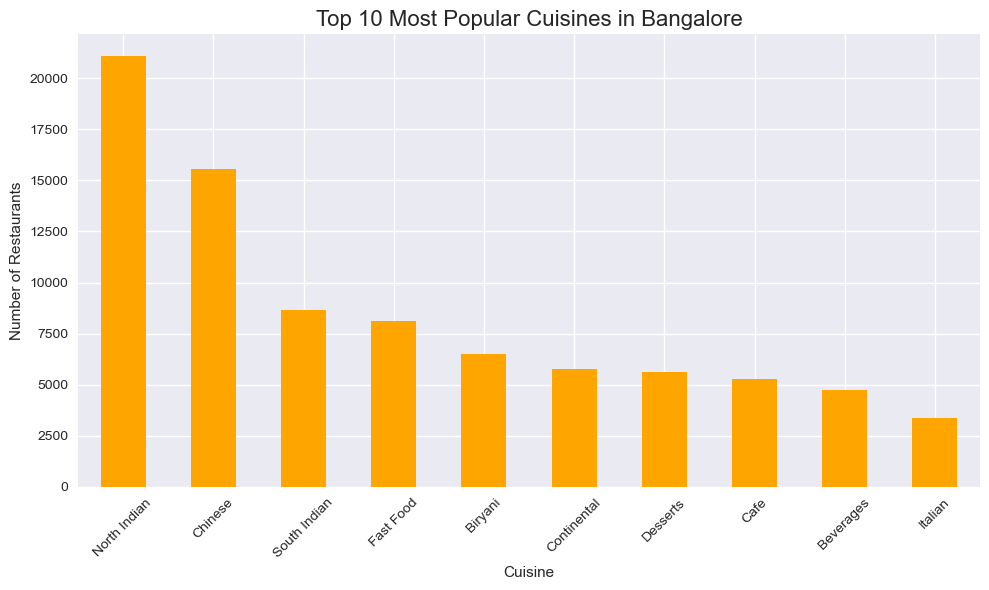

In [7]:
# Split cuisines and count them
cuisine_list = df['cuisines'].str.split(', ').explode()

# Plot top 10
plt.figure(figsize=(10,6))
cuisine_list.value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Popular Cuisines in Bangalore", fontsize=16)
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../presentation/eda_graph1.png', dpi=150, bbox_inches='tight')
plt.show()

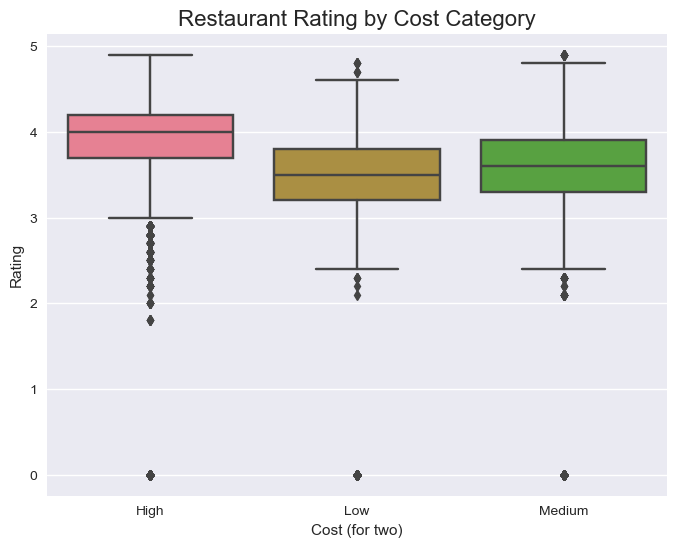

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='cost_category', y='rate')
plt.title("Restaurant Rating by Cost Category", fontsize=16)
plt.xlabel("Cost (for two)")
plt.ylabel("Rating")
plt.savefig('../presentation/eda_graph2.png', dpi=150, bbox_inches='tight')
plt.show()

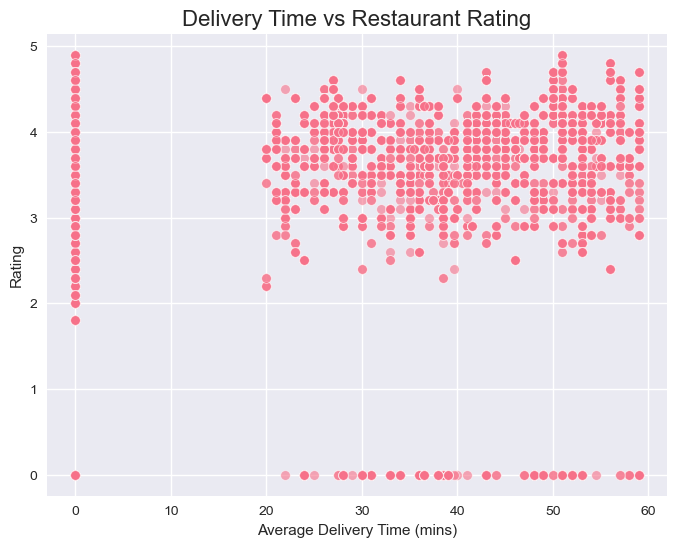

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='avg_delivery_time', y='rate', alpha=0.6)
plt.title("Delivery Time vs Restaurant Rating", fontsize=16)
plt.xlabel("Average Delivery Time (mins)")
plt.ylabel("Rating")
plt.grid(True)
plt.savefig('../presentation/eda_graph3.png', dpi=150, bbox_inches='tight')
plt.show()

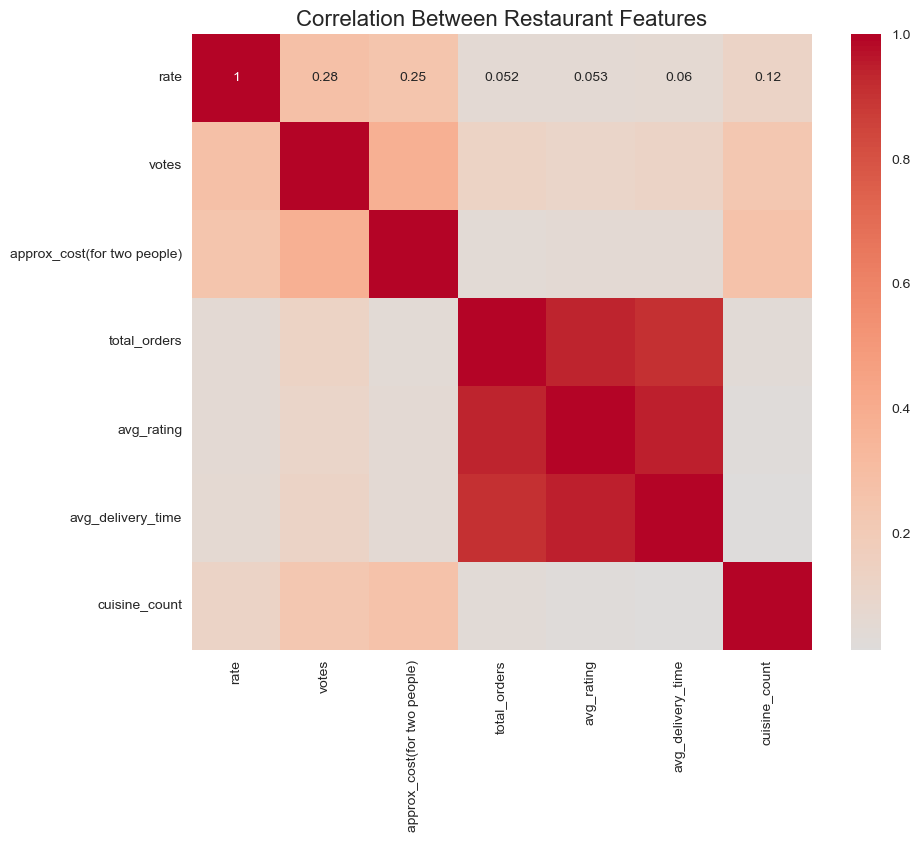

In [10]:
# Pick numeric columns
numeric_cols = ['rate', 'votes', 'approx_cost(for two people)', 'total_orders', 'avg_rating', 'avg_delivery_time', 'cuisine_count']

# Calculate correlation
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Restaurant Features", fontsize=16)
plt.savefig('../presentation/eda_graph4.png', dpi=150, bbox_inches='tight')
plt.show()